# Importing libraries

In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

# Dataset Description

In [2]:
df = pd.read_csv('rideshare_kaggle.csv')

In [3]:
df.shape

(693071, 57)

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

# Exploratory Data Analysis

In [6]:
#selecting the appropriate features according to the problem statement
new_df = df[['hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination', 'cab_type', 'product_id', 'name', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'short_summary', 'long_summary']]

In [7]:
new_df.shape

(693071, 17)

In [8]:
new_df.head()

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,Rain throughout the day.
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,0.44,1.0,42.2148,-71.033,43.58,Rain,"Rain until morning, starting again in the eve..."
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,0.44,1.0,42.2148,-71.033,38.33,Clear,Light rain in the morning.
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,0.44,1.0,42.2148,-71.033,34.38,Clear,Partly cloudy throughout the day.
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,Mostly cloudy throughout the day.


In [9]:
new_df.tail()
#we have only 2018 data

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary,long_summary
693066,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,1.0,1.0,42.3519,-71.0643,37.05,Partly Cloudy,Light rain in the morning and overnight.
693067,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,1.0,1.0,42.3519,-71.0643,37.05,Partly Cloudy,Light rain in the morning and overnight.
693068,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,1.0,1.0,42.3519,-71.0643,37.05,Partly Cloudy,Light rain in the morning and overnight.
693069,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,1.0,1.0,42.3519,-71.0643,37.05,Partly Cloudy,Light rain in the morning and overnight.
693070,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,1.0,1.0,42.3519,-71.0643,37.05,Partly Cloudy,Light rain in the morning and overnight.


In [10]:
# extracting day name feature from datetime
new_df['datetime'] = pd.to_datetime(new_df['datetime'])
new_df['day_name'] = new_df['datetime'].dt.day_name()

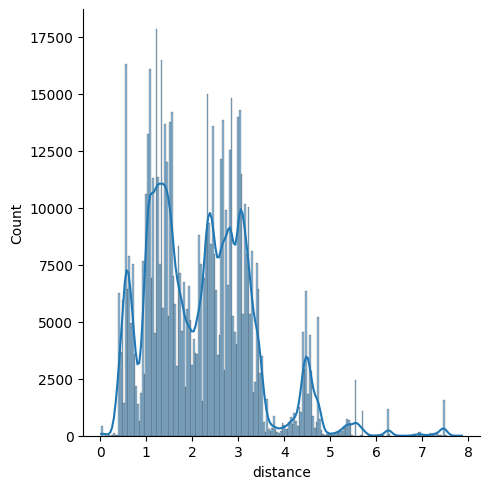

In [11]:
# distribution plot of distance feature
sns.displot(new_df['distance'], kde = True)

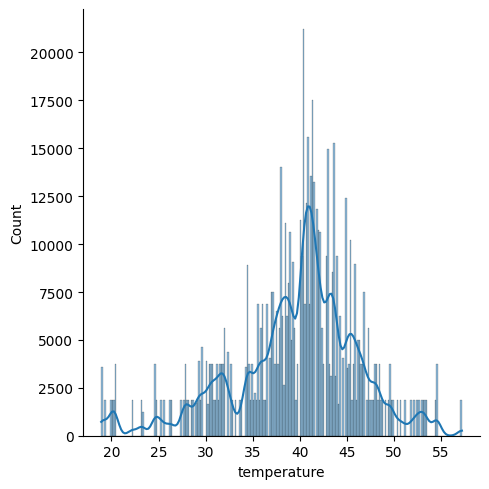

In [12]:
# distribution plot of temperature feature
sns.displot(new_df['temperature'], kde = True)

In [13]:
# We will work on these attributes
data = new_df[['hour', 'day', 'month', 'day_name','source', 'destination', 'cab_type', 'name', 'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature', 'short_summary']]

In [14]:
data.head()

,hour,day,month,day_name,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary
0,9,16,12,Sunday,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy
1,2,27,11,Tuesday,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,42.2148,-71.033,43.58,Rain
2,1,28,11,Wednesday,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,42.2148,-71.033,38.33,Clear
3,4,30,11,Friday,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,42.2148,-71.033,34.38,Clear
4,3,29,11,Thursday,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy


<Axes: xlabel='hour', ylabel='count'>

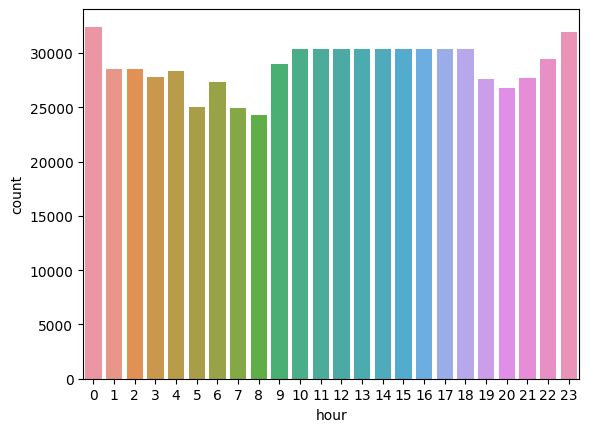

In [15]:
sns.countplot(data = data, x = 'hour')
# most no of cabs are booked between 11pm to 12pm
# See a good amount of bookings from 10am to 6pm

<Axes: xlabel='day', ylabel='count'>

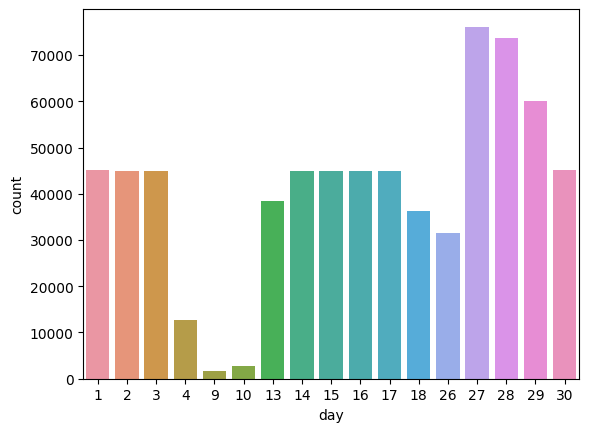

In [16]:
sns.countplot(data = data, x = 'day')
#month end are busiest

<Axes: xlabel='day_name', ylabel='count'>

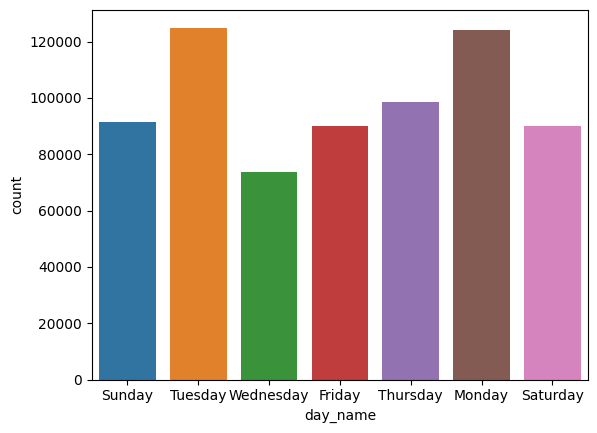

In [17]:
sns.countplot(data = data, x = 'day_name')
# most no of cabs are on Monday and Tuesday

<Axes: xlabel='cab_type', ylabel='count'>

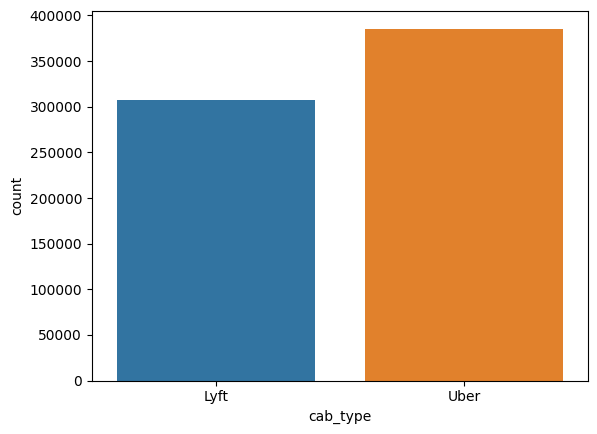

In [18]:
sns.countplot(data = data, x = 'cab_type')

In [19]:
data[data['cab_type'] == 'Lyft']['name'].value_counts()

name
Lux             51235
Lyft            51235
Lux Black XL    51235
Lyft XL         51235
Lux Black       51235
Shared          51233
Name: count, dtype: int64

In [20]:
data[data['cab_type'] == 'Uber']['name'].value_counts()

name
UberXL       55096
WAV          55096
Black SUV    55096
Black        55095
Taxi         55095
UberX        55094
UberPool     55091
Name: count, dtype: int64

<Axes: xlabel='surge_multiplier', ylabel='count'>

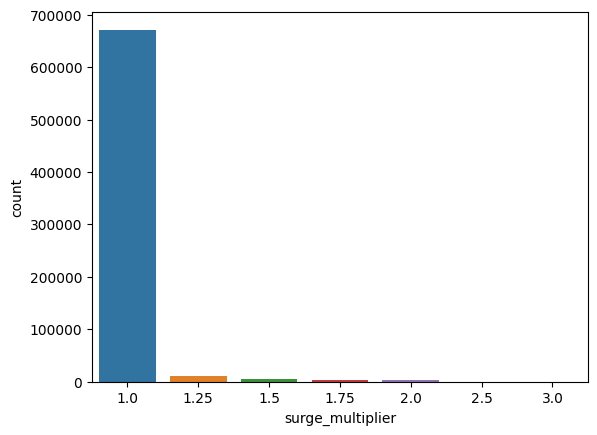

In [21]:
sns.countplot(data = data, x = 'surge_multiplier')
# most of the cabs are booked with less surge multiplier
# as the cab prices increases booking decreases 

In [22]:
data['temperature_range'] = pd.cut(x = data['temperature'], bins = [18, 24, 31, 38, 45, 52, 58], labels = ['18-24', '25-31', '32-38','39-45','46-52','53-58'])

<Axes: xlabel='temperature_range', ylabel='count'>

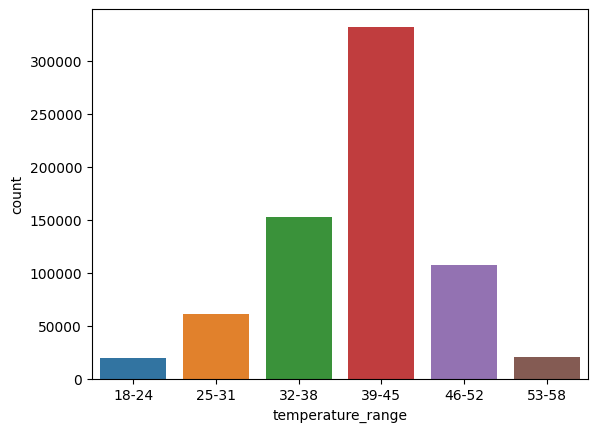

In [23]:
sns.countplot(data = data, x = 'temperature_range')
# most of the bookings is in 39-45 temperature range

In [24]:
data['distance_range'] = pd.cut(x = data['distance'], bins = [0, 2, 5, 8], labels = ['0-2','3-5','6-8'])

<Axes: xlabel='distance_range', ylabel='count'>

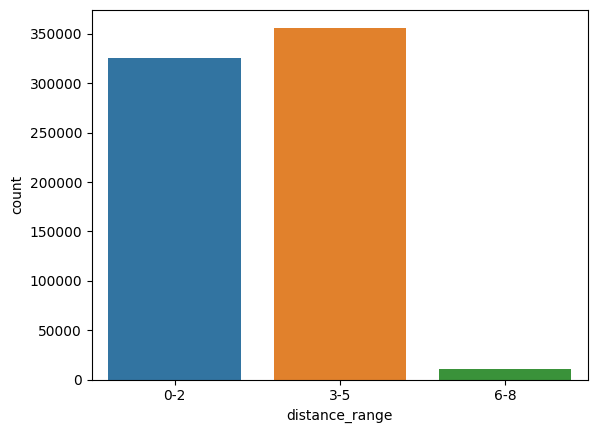

In [25]:
sns.countplot(data = data, x = 'distance_range')

In [26]:
data.head()

,hour,day,month,day_name,source,destination,cab_type,name,distance,surge_multiplier,latitude,longitude,temperature,short_summary,temperature_range,distance_range
0,9,16,12,Sunday,Haymarket Square,North Station,Lyft,Shared,0.44,1.0,42.2148,-71.033,42.34,Mostly Cloudy,39-45,0-2
1,2,27,11,Tuesday,Haymarket Square,North Station,Lyft,Lux,0.44,1.0,42.2148,-71.033,43.58,Rain,39-45,0-2
2,1,28,11,Wednesday,Haymarket Square,North Station,Lyft,Lyft,0.44,1.0,42.2148,-71.033,38.33,Clear,39-45,0-2
3,4,30,11,Friday,Haymarket Square,North Station,Lyft,Lux Black XL,0.44,1.0,42.2148,-71.033,34.38,Clear,32-38,0-2
4,3,29,11,Thursday,Haymarket Square,North Station,Lyft,Lyft XL,0.44,1.0,42.2148,-71.033,37.44,Partly Cloudy,32-38,0-2


[]

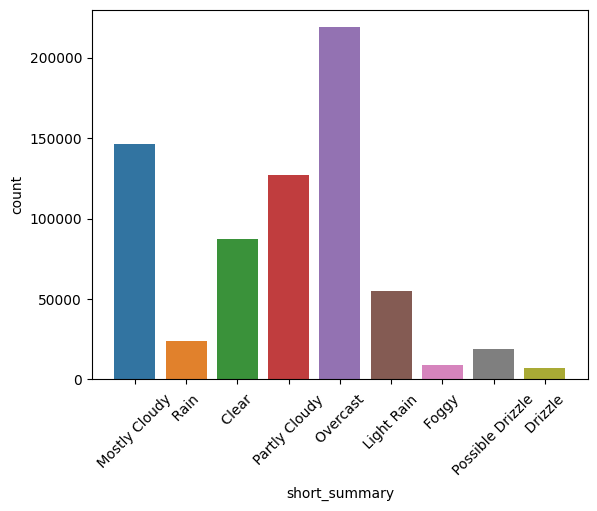

In [27]:
sns.countplot(data = data, x = 'short_summary')
plt.xticks(rotation = 45)
plt.plot()

[]

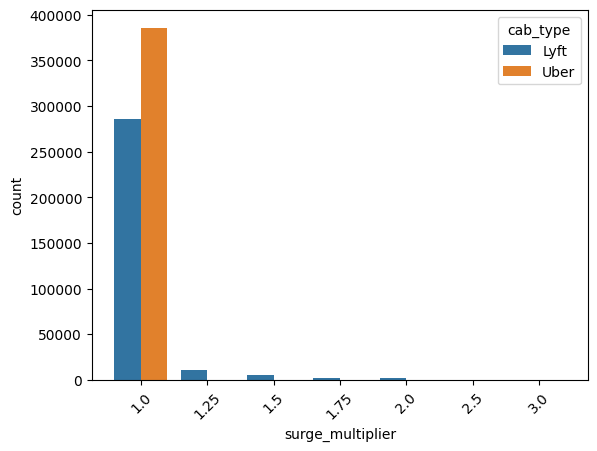

In [28]:
sns.countplot(data = data, x = 'surge_multiplier', hue = 'cab_type')
plt.xticks(rotation = 45)
plt.plot()
# Only Lyft cabs increased the surge_multiplier

# Inferences

1. Busiest hours for cab bookings were 10AM-6AM and 11PM-12PM.
2. Month ends from 27-30th were busiest.
3. Most number of cabs were booked on Monday and Tuesday.
4. Less number of cabs were booked as the prices increased.
5. Customers preferred cabs for mid distance ranges.
6. Customers avoided cabs during rain and foggy weather.

# Segmentation

In [29]:
df1 = pd.read_csv('sigma_cabs.csv')

In [30]:
df1.head()

,Trip_ID,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Var1,Var2,Var3,Gender,Surge_Pricing_Type
0,T0005689460,6.77,B,1.0,2.42769,A,A,3.90500,0,40.0,46,60,Female,2
1,T0005689461,29.47,B,10.0,2.78245,B,A,3.45000,0,38.0,56,78,Male,2
2,T0005689464,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,NaN,56,77,Male,2
3,T0005689465,61.56,C,10.0,NaN,NaN,A,3.45375,0,NaN,52,74,Male,3
4,T0005689467,54.95,C,10.0,3.03453,B,A,3.40250,4,51.0,49,102,Male,2


In [31]:
df1.shape

(131662, 14)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [33]:
#dropping undesired attributes
data1 = df1.drop(['Trip_ID', 'Var1', 'Var2', 'Var3'], axis = 1)

In [34]:
data1.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Surge_Pricing_Type
0,6.77,B,1.0,2.42769,A,A,3.90500,0,Female,2
1,29.47,B,10.0,2.78245,B,A,3.45000,0,Male,2
2,41.58,NaN,10.0,NaN,NaN,E,3.50125,2,Male,2
3,61.56,C,10.0,NaN,NaN,A,3.45375,0,Male,3
4,54.95,C,10.0,3.03453,B,A,3.40250,4,Male,2


In [35]:
data1.isna().sum()

Trip_Distance                      0
Type_of_Cab                    20210
Customer_Since_Months           5920
Life_Style_Index               20193
Confidence_Life_Style_Index    20193
Destination_Type                   0
Customer_Rating                    0
Cancellation_Last_1Month           0
Gender                             0
Surge_Pricing_Type                 0
dtype: int64

In [36]:
#dropping all the null values
data1 = data1.dropna(axis = 0)

In [37]:
data1.isna().sum()

Trip_Distance                  0
Type_of_Cab                    0
Customer_Since_Months          0
Life_Style_Index               0
Confidence_Life_Style_Index    0
Destination_Type               0
Customer_Rating                0
Cancellation_Last_1Month       0
Gender                         0
Surge_Pricing_Type             0
dtype: int64

In [38]:
data1.shape

(90052, 10)

In [39]:
cat_cols = []
for col in data1.columns:
    if data1[col].dtypes == 'object':
        cat_cols.append(col)

In [40]:
cat_cols

['Type_of_Cab', 'Confidence_Life_Style_Index', 'Destination_Type', 'Gender']

In [41]:
num_cols = data1.columns.difference(cat_cols)

In [42]:
num_cols

Index(['Cancellation_Last_1Month', 'Customer_Rating', 'Customer_Since_Months',
       'Life_Style_Index', 'Surge_Pricing_Type', 'Trip_Distance'],
      dtype='object')

## Data Pre-processing

In [43]:
data1_copy = data1.copy()

In [44]:
encoder = LabelEncoder()
for col in cat_cols:
    data1_copy[col] = encoder.fit_transform(data1[col])

In [45]:
data1_copy.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Surge_Pricing_Type
0,6.77,1,1.0,2.42769,0,0,3.9050,0,0,2
1,29.47,1,10.0,2.78245,1,0,3.4500,0,1,2
4,54.95,2,10.0,3.03453,1,0,3.4025,4,1,2
6,29.72,4,10.0,2.83958,2,1,2.9750,1,1,2
7,18.44,1,2.0,2.81871,1,0,3.5825,0,1,2


In [46]:
data1_scaled = pd.DataFrame()
scaler = StandardScaler()
data1_scaled[data1_copy.columns] = scaler.fit_transform(data1_copy[data1_copy.columns])

In [47]:
data1_scaled.head()

,Trip_Distance,Type_of_Cab,Customer_Since_Months,Life_Style_Index,Confidence_Life_Style_Index,Destination_Type,Customer_Rating,Cancellation_Last_1Month,Gender,Surge_Pricing_Type
0,-1.479439,-0.570050,-1.381087,-1.726135,-1.233471,-0.522602,1.076925,-0.754895,-1.573437,-0.208868
1,-0.591002,-0.570050,1.099971,-0.124347,0.000534,-0.522602,0.609733,-0.754895,0.635551,-0.208868
2,0.406238,0.231207,1.099971,1.013828,0.000534,-0.522602,0.560961,3.085553,0.635551,-0.208868
3,-0.581218,1.833723,1.099971,0.133603,1.234540,-0.000771,0.122006,0.205217,0.635551,-0.208868
4,-1.022697,-0.570050,-1.105414,0.039372,0.000534,-0.522602,0.745784,-0.754895,0.635551,-0.208868


In [48]:
wcss = []
for cluster in range(1, 21):
    km = KMeans(n_clusters = cluster)
    km.fit_predict(data1_scaled)
    wcss.append(km.inertia_)

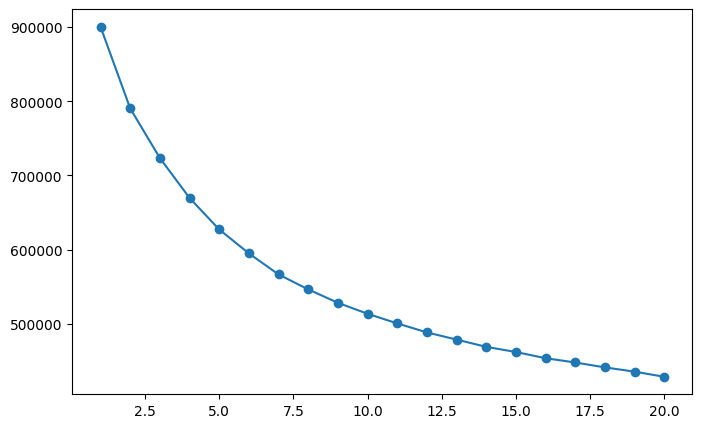

In [49]:
plt.figure(figsize = (8, 5))
plt.plot(range(1, 21), wcss, marker = 'o')
#there is no clear elbow point

# Segmentation Description

In [50]:
# Considering 4 clusters
km = KMeans(n_clusters = 4)
data1['Cluster'] = km.fit_predict(data1_scaled)

## Segment0

In [51]:
segment0 = data1[data1['Cluster'] == 0]
segment0.shape

(5834, 11)

In [52]:
for col in cat_cols:
    print(segment0[col].value_counts()/len(segment0[col]))
#mostly covers the customers with destination_type = A
#average customer ratings between 2.5-3.7
#life_style_index between 2.8-3.2
#higher values of trip distance

Type_of_Cab
B    0.243401
C    0.240315
D    0.199520
A    0.187179
E    0.129585
Name: count, dtype: float64
Confidence_Life_Style_Index
A    0.386356
B    0.320878
C    0.292767
Name: count, dtype: float64
Destination_Type
F    0.180151
G    0.170381
H    0.143298
E    0.124100
I    0.097360
K    0.081248
J    0.079705
L    0.078334
D    0.021255
N    0.013370
M    0.010799
Name: count, dtype: float64
Gender
Male      0.713576
Female    0.286424
Name: count, dtype: float64


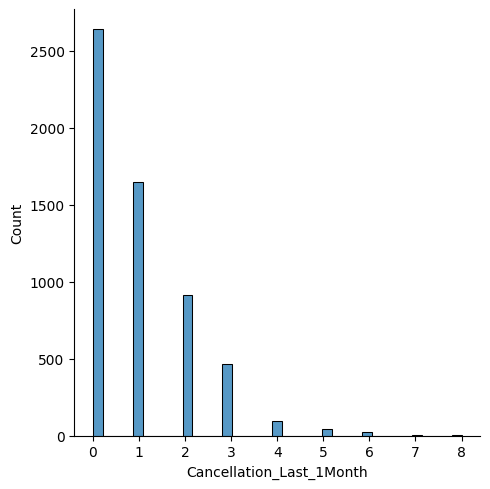

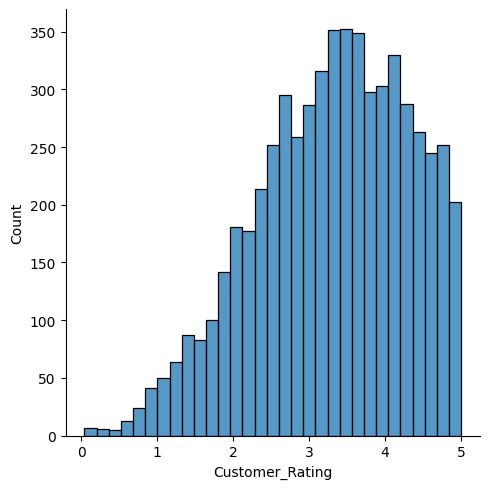

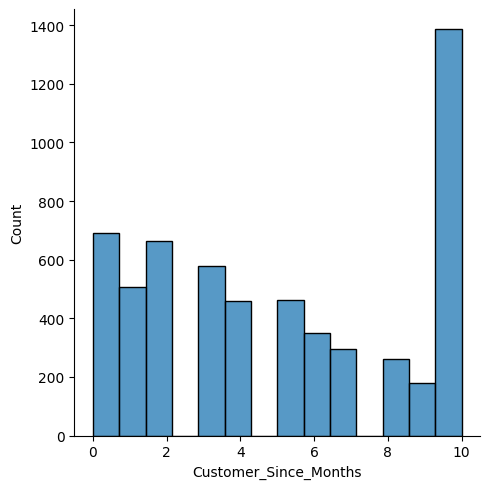

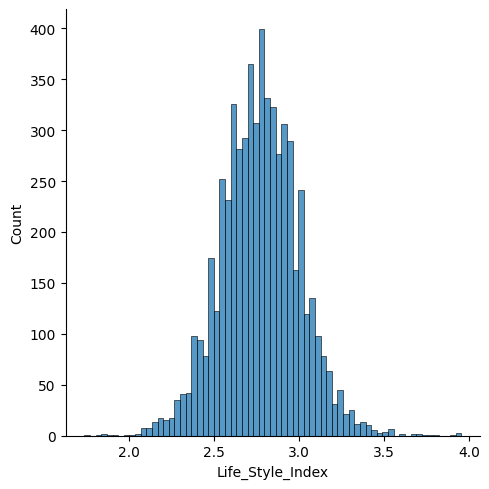

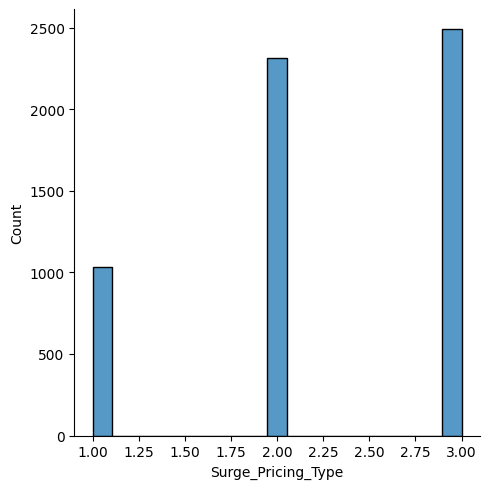

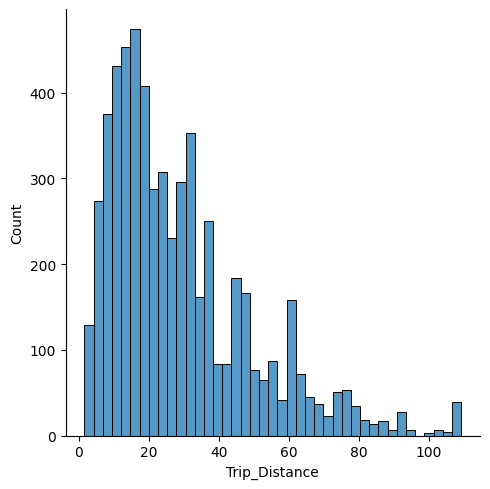

In [53]:
for col in num_cols:
    sns.displot(segment0[col])

## Segment 1

In [54]:
segment1 = data1[data1['Cluster'] == 1]
segment1.shape

(29133, 11)

In [55]:
for col in cat_cols:
    print(segment1[col].value_counts()/len(segment1[col]))

Type_of_Cab
C    0.331102
D    0.323894
E    0.203069
B    0.104521
A    0.037415
Name: count, dtype: float64
Confidence_Life_Style_Index
C    0.409089
B    0.366183
A    0.224728
Name: count, dtype: float64
Destination_Type
A    0.673772
B    0.191638
D    0.074383
C    0.050184
E    0.008753
F    0.001270
Name: count, dtype: float64
Gender
Male      0.709505
Female    0.290495
Name: count, dtype: float64


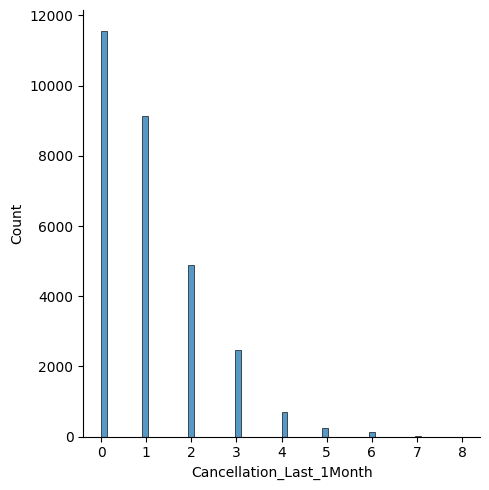

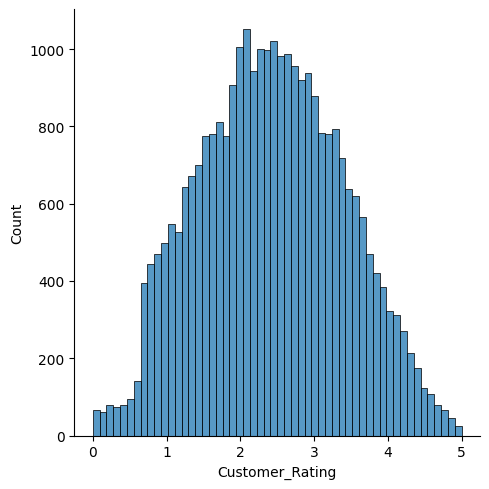

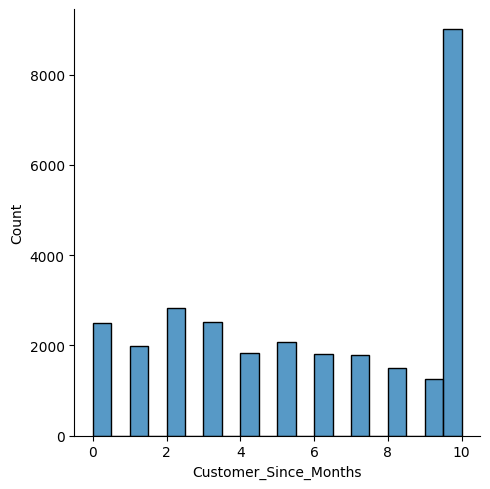

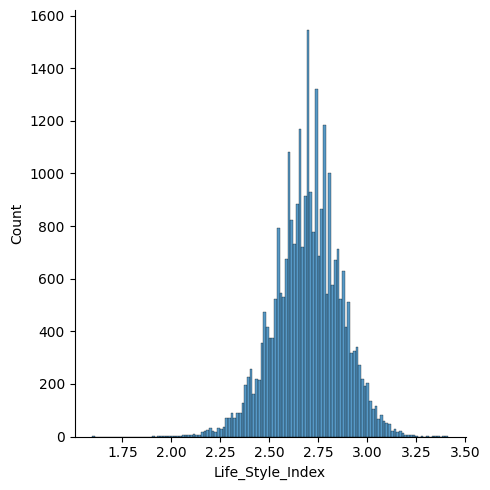

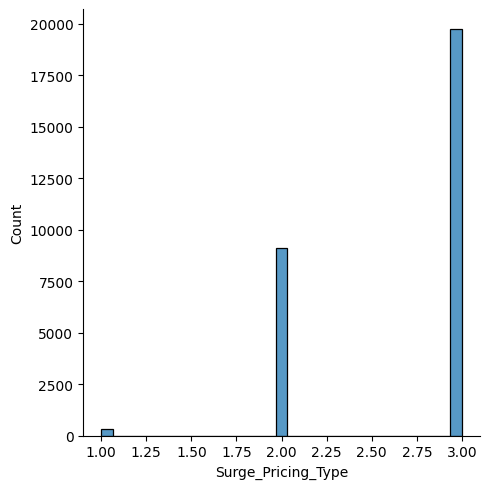

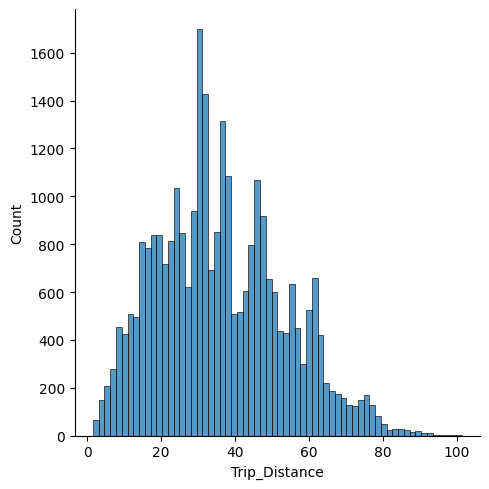

In [56]:
for col in num_cols:
    sns.displot(segment1[col])

# Segment 2

In [57]:
segment2 = data1[data1['Cluster'] == 2]
segment2.shape

(24036, 11)

In [58]:
for col in cat_cols:
    print(segment2[col].value_counts()/len(segment2[col]))
#mostly covers the customers with Confidence_Life_Style_Index = A

Type_of_Cab
B    0.286404
C    0.278249
A    0.180562
D    0.158762
E    0.096023
Name: count, dtype: float64
Confidence_Life_Style_Index
B    0.487727
C    0.481861
A    0.030413
Name: count, dtype: float64
Destination_Type
A    0.646405
B    0.238392
C    0.065818
D    0.027500
E    0.011150
F    0.010151
G    0.000458
H    0.000125
Name: count, dtype: float64
Gender
Male      0.716217
Female    0.283783
Name: count, dtype: float64


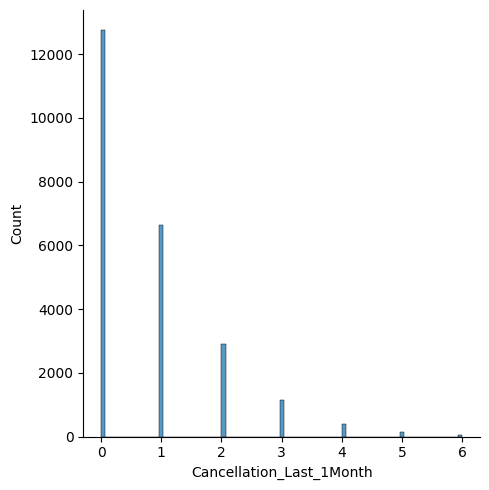

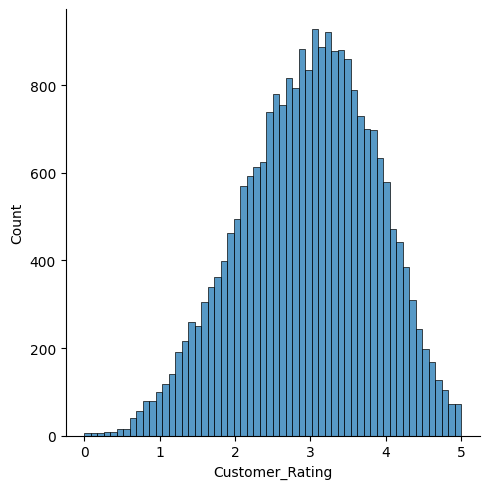

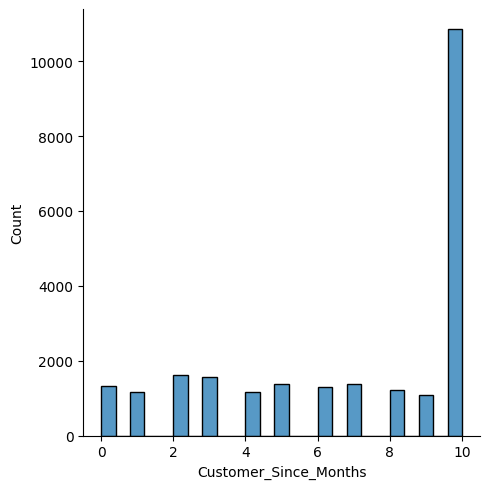

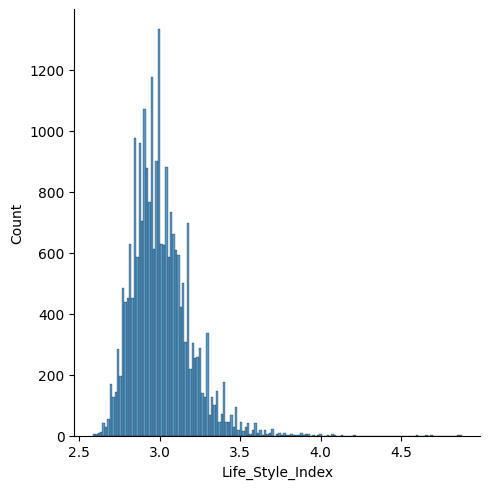

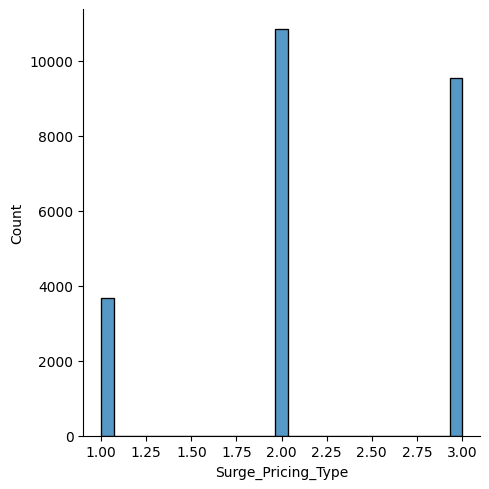

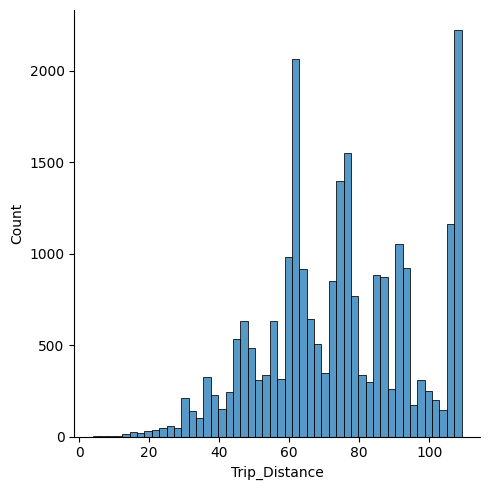

In [59]:
for col in num_cols:
    sns.displot(segment2[col])

## Segment 3

In [60]:
segment3 = data1[data1['Cluster'] == 3]
segment3.shape

(31049, 11)

In [61]:
for col in cat_cols:
    print(segment3[col].value_counts()/len(segment3[col]))
#This segment mostly overs customers with F,G,H,E as their destination type
#mostly covers customers with higher customer ratings between 3-5
#Long time customers with 10 months as their duration

Type_of_Cab
B    0.448002
A    0.350575
C    0.159619
D    0.028471
E    0.013334
Name: count, dtype: float64
Confidence_Life_Style_Index
A    0.645947
B    0.214242
C    0.139811
Name: count, dtype: float64
Destination_Type
A    0.579761
B    0.285420
C    0.064414
D    0.049374
E    0.019807
F    0.001224
Name: count, dtype: float64
Gender
Male      0.711617
Female    0.288383
Name: count, dtype: float64


In [62]:
segment3[num_cols].describe()

,Cancellation_Last_1Month,Customer_Rating,Customer_Since_Months,Life_Style_Index,Surge_Pricing_Type,Trip_Distance
count,31049.000000,31049.000000,31049.000000,31049.000000,31049.000000,31049.000000
mean,0.499501,3.094998,5.657863,2.768419,1.584946,32.292069
std,0.783721,0.885122,3.627009,0.190569,0.539362,15.101665
min,0.000000,0.003750,0.000000,1.656960,1.000000,0.310000
25%,0.000000,2.470000,2.000000,2.644430,1.000000,20.480000
50%,0.000000,3.145000,6.000000,2.773420,2.000000,30.780000
75%,1.000000,3.762500,10.000000,2.900320,2.000000,43.620000
max,6.000000,5.000000,10.000000,3.857490,3.000000,93.710000


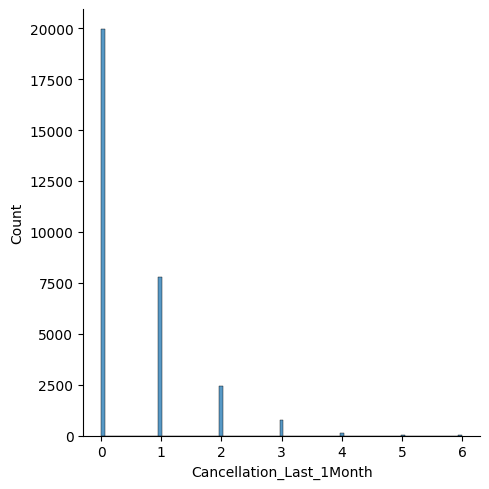

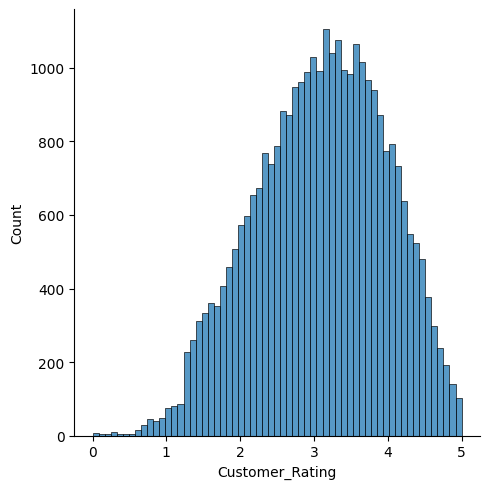

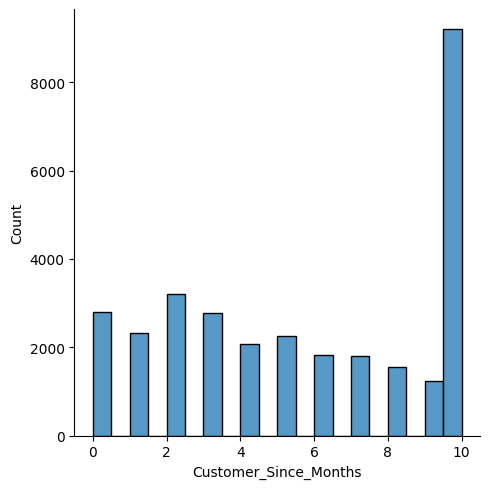

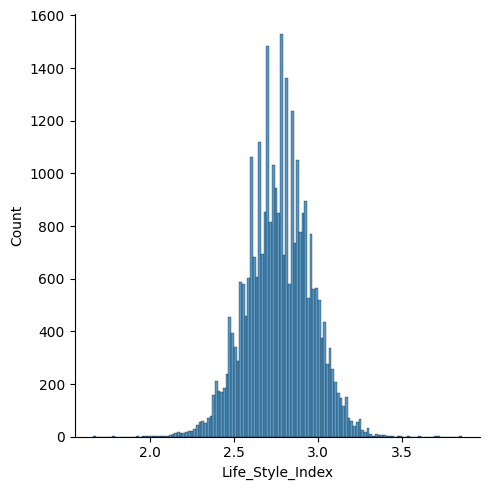

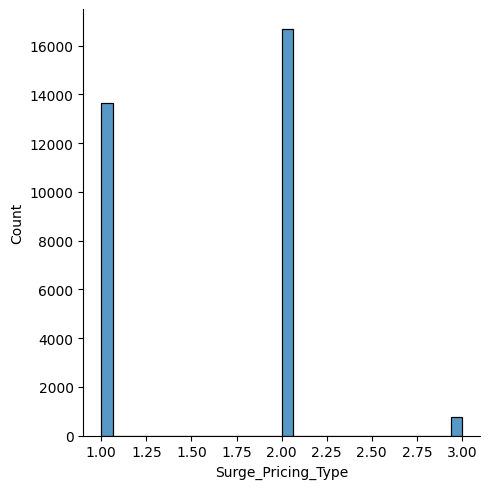

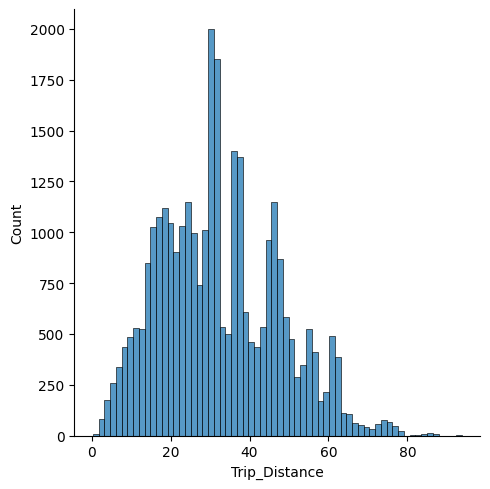

In [63]:
for col in num_cols:
    sns.displot(segment3[col])